# 2015-11-02 lognote

## ToDo
- 周波数を 2 回セットしてカモメをとってみる
- RHEA board mass production
    + ジーエヌディーにコンタクト
    + how many? 
        + total 6?  
        2 for GB, 1 for Yoshida, 1 for Kyungmin, 1 for Hayato (To be confirmed), 1 for Mima 
    + GND optimal はいくつ？
    + 納期、金額確認

In [62]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### dev 取得データを扱うクラス
sweep.py でとったデータを扱うクラス（SweepData）と csv データを read する関数（read_sweep）

In [69]:
class SweepData(object):
    def __init__(self, freq, i_mean, q_mean, i=None, q=None):
        self.freq   = np.array(freq)
        self.i_mean = np.array(i_mean)
        self.q_mean = np.array(q_mean)
        self.i = np.array(i)
        self.q = np.array(q)
        
    def abs(self):
        return np.abs(self.i_mean + 1j* self.q_mean)


In [65]:
def read_sweep(fname, nchan=2, skiprows=10, skipfooter=None, comment='#', delimiter=','):
    with open(fname, 'r') as f:
        lines = f.readlines()

    if skipfooter is not None:
        lines = lines[skiprows:-skipfooter]
    else:
        lines = lines[skiprows:]
        
    d_unit = len(lines[0].split(delimiter)) # this value is 3 if -r option is not set
    
    freq   = []
    i_mean = []
    q_mean = []
    i      = [list() for k in range(nchan)] if d_unit > 3 else None
    q      = [list() for k in range(nchan)] if d_unit > 3 else None
    for line in lines:
        if line[0] == comment: continue
        l = [float(x) for x in line.split(delimiter)]
        freq.append(l[0])
        i_mean.append(l[1])
        q_mean.append(l[2])
        if i is None and q is None: continue
        sample = (len(l) - 3) / (nchan*2)
        for ch in range(nchan):
            i[ch].append(l[       ch *sample+3 :       (ch+1)*sample+3])
            q[ch].append(l[(nchan+ch)*sample+3 : (nchan+ch+1)*sample+3])

    if i is None and q is None:
#         return freq, i_mean, q_mean
        return SweepData(freq, i_mean, q_mean)
    else:
#         return freq, i_mean, q_mean, i, q
        return SweepData(freq, i_mean, q_mean, i, q)

sd = read_sweep('/home/hikaru/readout/data/sweep_20151030_094910.csv', skiprows=10)

### 周波数設定を変えた場合 (set 1 or 2)

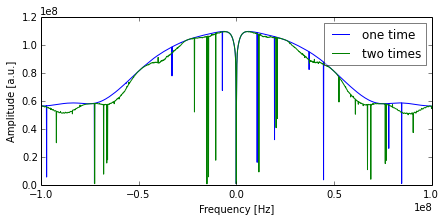

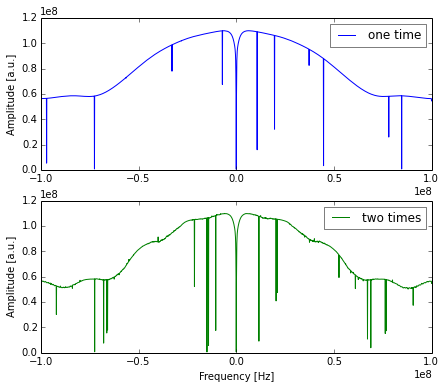

In [85]:
def foo():
    sd_one = read_sweep('/home/hikaru/readout/data/sweep_20151102_064852.csv')
    sd_two = read_sweep('/home/hikaru/readout/data/sweep_20151102_070159.csv')
    
    fig, ax = plt.subplots(figsize=(7, 3))
    ax.plot(sd_one.freq, sd_one.abs(), label='one time')
    ax.plot(sd_two.freq, sd_two.abs(), label='two times')
    leg = ax.legend()
    leg.get_frame().set_alpha(0.5)
    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('Amplitude [a.u.]')
    
    fig, ax = plt.subplots(figsize=(7, 6), nrows=2)
    ax[0].plot(sd_one.freq, sd_one.abs(), label='one time')
    ax[1].plot(sd_two.freq, sd_two.abs(), label='two times', c='green')
    leg0 = ax[0].legend()
    leg1 = ax[1].legend()
    leg0.get_frame().set_alpha(0.5)
    leg1.get_frame().set_alpha(0.5)
    ax[1].set_xlabel('Frequency [Hz]')
    ax[0].set_ylabel('Amplitude [a.u.]')
    ax[1].set_ylabel('Amplitude [a.u.]')
    
foo()